In [48]:
import xarray as xr
import matplotlib.pyplot as plt
from helpers.plot_helpers import *
from helpers.computational_tools import gaussian_remesh
%load_ext autoreload
%autoreload 3
import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from helpers.collection_of_experiments import *

In [3]:
ds = CollectionOfExperiments.init_folder('/home/ctrsp-2024/pp2681/experiments/Feb2022/bare', additional_subfolder='output')
ds += CollectionOfExperiments.init_folder('/home/ctrsp-2024/pp2681/experiments/generalization-boundary10', additional_subfolder='output', prefix='boundary10')
ds += CollectionOfExperiments.init_folder('/home/ctrsp-2024/pp2681/experiments/SSM-streamfunction', additional_subfolder='output', prefix='SSM-streamfunction')
ds += CollectionOfExperiments.init_folder('/home/ctrsp-2024/pp2681/experiments/generalization-FGR-sqrt12', additional_subfolder='output', prefix='FGR-sqrt12')

In [9]:
for RR in ['R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8']:
    ds.remesh('R64', RR)

Experiment R64 coarsegrained to R2 is created. Its identificator=R64_R2
Experiment R64 coarsegrained to R3 is created. Its identificator=R64_R3
Experiment R64 coarsegrained to R4 is created. Its identificator=R64_R4
Experiment R64 coarsegrained to R5 is created. Its identificator=R64_R5
Experiment R64 coarsegrained to R6 is created. Its identificator=R64_R6
Experiment R64 coarsegrained to R7 is created. Its identificator=R64_R7
Experiment R64 coarsegrained to R8 is created. Its identificator=R64_R8


In [12]:
for RR in ['R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8']:
    ds.remesh('R64', RR, operator=gaussian_remesh, FGR=np.sqrt(6), exp=f'R64_{RR}_FGR-sqrt6')

for RR in ['R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8']:
    for file in [f'/home/ctrsp-2024/pp2681/notebooks/filtered-data/R64_{RR}_FGR-sqrt6-part1-f32.nc', 
                 f'/home/ctrsp-2024/pp2681/notebooks/filtered-data/R64_{RR}_FGR-sqrt6-part2-f32.nc',
                 f'/home/ctrsp-2024/pp2681/notebooks/filtered-data/R64_{RR}_FGR-sqrt6-part3-f32.nc']:
            dataset = xr.open_dataset(file, decode_times=False, chunks={'Time':5})
            for key in dataset.keys():
                var = dataset[key]
                #var['Time'] = ds['R64'].u['Time']
                setattr(ds[f'R64_{RR}_FGR-sqrt6'], key, var)

Experiment R64 coarsegrained to R2 is created. Its identificator=R64_R2_FGR-sqrt6
Experiment R64 coarsegrained to R3 is created. Its identificator=R64_R3_FGR-sqrt6
Experiment R64 coarsegrained to R4 is created. Its identificator=R64_R4_FGR-sqrt6
Experiment R64 coarsegrained to R5 is created. Its identificator=R64_R5_FGR-sqrt6
Experiment R64 coarsegrained to R6 is created. Its identificator=R64_R6_FGR-sqrt6
Experiment R64 coarsegrained to R7 is created. Its identificator=R64_R7_FGR-sqrt6
Experiment R64 coarsegrained to R8 is created. Its identificator=R64_R8_FGR-sqrt6


In [66]:
for RR in ['R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8']:
    ds.remesh('R64', RR, operator=gaussian_remesh, FGR=np.sqrt(12), exp=f'R64_{RR}_FGR-sqrt12')

for RR in ['R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8']:
    for file in [f'/home/ctrsp-2024/pp2681/notebooks/filtered-data/R64_{RR}_FGR-sqrt12-part1.nc', 
                 f'/home/ctrsp-2024/pp2681/notebooks/filtered-data/R64_{RR}_FGR-sqrt12-part2.nc',
                 f'/home/ctrsp-2024/pp2681/notebooks/filtered-data/R64_{RR}_FGR-sqrt12-part3.nc']:
            dataset = xr.open_dataset(file, decode_times=False, chunks={'Time':5})
            for key in dataset.keys():
                var = dataset[key]
                #print(file, key, len(var['Time']))
                setattr(ds[f'R64_{RR}_FGR-sqrt12'], key, var)

Experiment R64 coarsegrained to R2 is created. Its identificator=R64_R2_FGR-sqrt12
Experiment R64 coarsegrained to R3 is created. Its identificator=R64_R3_FGR-sqrt12
Experiment R64 coarsegrained to R4 is created. Its identificator=R64_R4_FGR-sqrt12
Experiment R64 coarsegrained to R5 is created. Its identificator=R64_R5_FGR-sqrt12
Experiment R64 coarsegrained to R6 is created. Its identificator=R64_R6_FGR-sqrt12
Experiment R64 coarsegrained to R7 is created. Its identificator=R64_R7_FGR-sqrt12
Experiment R64 coarsegrained to R8 is created. Its identificator=R64_R8_FGR-sqrt12


In [85]:
#error = xr.open_dataset('generalization-Jul15.nc').load()
error = xr.open_dataset('generalization-FGR-sqrt12.nc').load()

In [57]:
%time KE('R64')

CPU times: user 36.1 ms, sys: 2.06 ms, total: 38.2 ms
Wall time: 37.2 ms


17.04075970194989

In [21]:
%time EKE('R64')

CPU times: user 51.7 s, sys: 49.6 s, total: 1min 41s
Wall time: 5min 51s


<xarray.DataArray ()>
array(10.91081797)

In [22]:
%time MKE('R64')

CPU times: user 658 ms, sys: 259 ms, total: 917 ms
Wall time: 1.65 s


<xarray.DataArray ()>
array(6.12994173)

In [58]:
%time APE('R64')

CPU times: user 13.2 ms, sys: 86 µs, total: 13.3 ms
Wall time: 12.7 ms


81.31324435644875

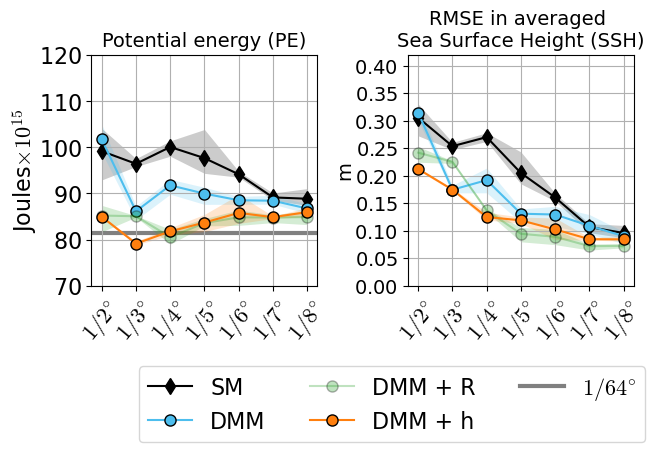

In [110]:
default_rcParams({'font.size': 16, 'figure.subplot.wspace': 0.4, 'figure.subplot.hspace': 0.1})
plt.figure(figsize=(7,3))

yellow = [0.9290, 0.6940, 0.1250]
violet = [0.4940, 0.1840, 0.5560]
lightblue = [0.3010, 0.7450, 0.9330]

for row, fun_str in enumerate(['APE', 'ssh']):
    plt.subplot(1,2,row+1)

    def plot_markers_with_filling(model='Jansen-Held', color='tab:red', marker='s', label=None, markersize=None, lw=None, ls=None, alpha=1):
        try:
            ave = []
            if 'sample' in error[model].dims:
                ave.append('sample')
            if 'zl' in error[model].dims:
                ave.append('zl')
    
            error[model].mean(ave).plot(color=color, marker=marker, label=label, markersize=markersize, markeredgecolor='k', lw=lw, ls=ls, alpha=alpha)
            plt.fill_between(range(7), error[model].min(ave), error[model].max(ave), color=color, alpha=0.2, lw=0)
        except:
            pass
    
    plot_markers_with_filling(f'bare-{fun_str}', 'k', 'd', 'SM', 8)
    #plot_markers_with_filling(f'bare-0.03-{fun_str}', 'k', 'd', 'bSM($C_S=0.03$)', 6)
    #plot_markers_with_filling(f'bare-0.01-{fun_str}', 'k', 'd', 'bSM($C_S=0.01$)', 4)

    #plot_markers_with_filling(f'SSMh-0.06-{fun_str}', 'tab:orange', 'd', 'bSM($C_S=0.06$)+SSMh', 8)
    #plot_markers_with_filling(f'SSMh-0.03-{fun_str}', 'tab:orange', 'd', 'bSM($C_S=0.03$)+SSMh', 6)
    #plot_markers_with_filling(f'SSMh-0.01-{fun_str}', 'tab:orange', 'd', 'bSM($C_S=0.01$)+SSMh', 4)

    #plot_markers_with_filling(f'zelong-False-ssm-True-reynolds-False-reduce-0-{fun_str}', lightblue, 'o', 'DbMM-GID-no-clip', 6)
    #plot_markers_with_filling(f'zelong-False-ssm-True-reynolds-False-reduce-1-{fun_str}', yellow, 'o', 'DbMM-GID-clip', 6)

    #plot_markers_with_filling(f'zelong-True-ssm-True-reynolds-False-reduce-0-{fun_str}', 'tab:green', 'o', 'DbMM-SSD-no-clip', 6)
    #plot_markers_with_filling(f'zelong-True-ssm-True-reynolds-False-reduce-1-{fun_str}', 'tab:red', 'o', 'DbMM-SSD-clip', 6)

    # plot_markers_with_filling(f'zelong-False-ssm-True-reynolds-False-reduce-1-{fun_str}', lightblue, 'o', 'DbMM', 8)
    # plot_markers_with_filling(f'SSMh-zelong-False-ssm-True-reynolds-False-reduce-1-{fun_str}', 'tab:orange', 'o', 'DbMM+SSMh', 8)
    # plot_markers_with_filling(f'SSMh-zelong-False-ssm-True-reynolds-True-reduce-1-{fun_str}', 'tab:green', 'd', 'DbMM-Reynolds+SSMh', 8)
    plot_markers_with_filling(f'DbMM-{fun_str}', lightblue, 'o', 'DMM', 8)
    plot_markers_with_filling(f'DbMM-R-{fun_str}', 'tab:green', 'o', 'DMM + R', 8, alpha=0.3)
    plot_markers_with_filling(f'DbMMh-{fun_str}', 'tab:orange', 'o', 'DMM + h', 8)
    #plot_markers_with_filling(f'DbMMh-R-{fun_str}', violet, 'd', 'DbMM2-R', 8)
    
    #if fun_str in ['KE', 'APE', 'EKE', 'MKE']:
    #    plot_markers_with_filling(f'R64-FGR-sqrt6-{fun_str}', 'k', '', 'fDNS', ls='--', lw=3)
    
    plt.xticks([0,1,2,3,4,5,6], ['$1/2^{\circ}$', '$1/3^{\circ}$', '$1/4^{\circ}$', '$1/5^{\circ}$', '$1/6^{\circ}$', '$1/7^{\circ}$', '$1/8^{\circ}$'],rotation=50)    
    plt.grid()
    plt.xlabel('')
    if fun_str == 'KE':
        yticks = np.arange(0,40,5)
        plt.ylabel('KE, Joules$\\times10^{15}$')
        plt.yticks(yticks)
        plt.ylim([0,20])
        plt.axhline(y=17.04075970194989,color='gray', zorder=-1,lw=3)
        #plt.text(0.0, 17.5,'$1/64^{\circ}$', color='gray')
    if fun_str == 'EKE':
        yticks = np.arange(0,40,5)
        plt.ylabel('EKE, Joules$\\times10^{15}$')
        plt.axhline(y=10.91081797,color='gray', zorder=-1,lw=3)
        plt.yticks(yticks)
        plt.ylim([0,20])
    if fun_str == 'MKE':
        yticks = np.arange(0,40,5)
        plt.ylabel('MKE, Joules$\\times10^{15}$')
        plt.axhline(y=6.12994173,color='gray', zorder=-1,lw=3)
        plt.yticks(yticks)
        plt.ylim([0,20])
    if fun_str == 'APE':
        yticks = np.arange(70,130,10)
        plt.ylabel('Joules$\\times10^{15}$')
        plt.title('Potential energy (PE)', fontsize=14)
        plt.yticks(yticks)
        plt.ylim([min(yticks), max(yticks)])
        plt.axhline(y=81.31324435644875,color='gray',zorder=-1,lw=3)
    
    if fun_str == 'ssh':
        yticks = np.arange(0,0.45,0.05)
        plt.ylabel('m', fontsize=14)
        plt.title('RMSE in averaged \nSea Surface Height (SSH)', fontsize=14)
        plt.yticks(yticks, fontsize=14)
        plt.ylim([0,0.42])

    if fun_str == 'Cs':
        plt.ylim([0,0.1])
        plt.ylabel('$C_S$')

plt.gcf().align_ylabels()
#set_letters(fontsize=18,x=0.0,y=1.05)
plt.plot(np.nan,np.nan,'-',color='gray',lw=3,label='$1/64^{\circ}$')
#plt.plot(np.nan,np.nan,'--',color='k',lw=3,label='filtered $1/64^{\circ}$')
plt.legend(ncol=3, bbox_to_anchor=(1.1,-0.3))

#plt.tight_layout()
plt.savefig('final/figure-metrics-3.pdf')

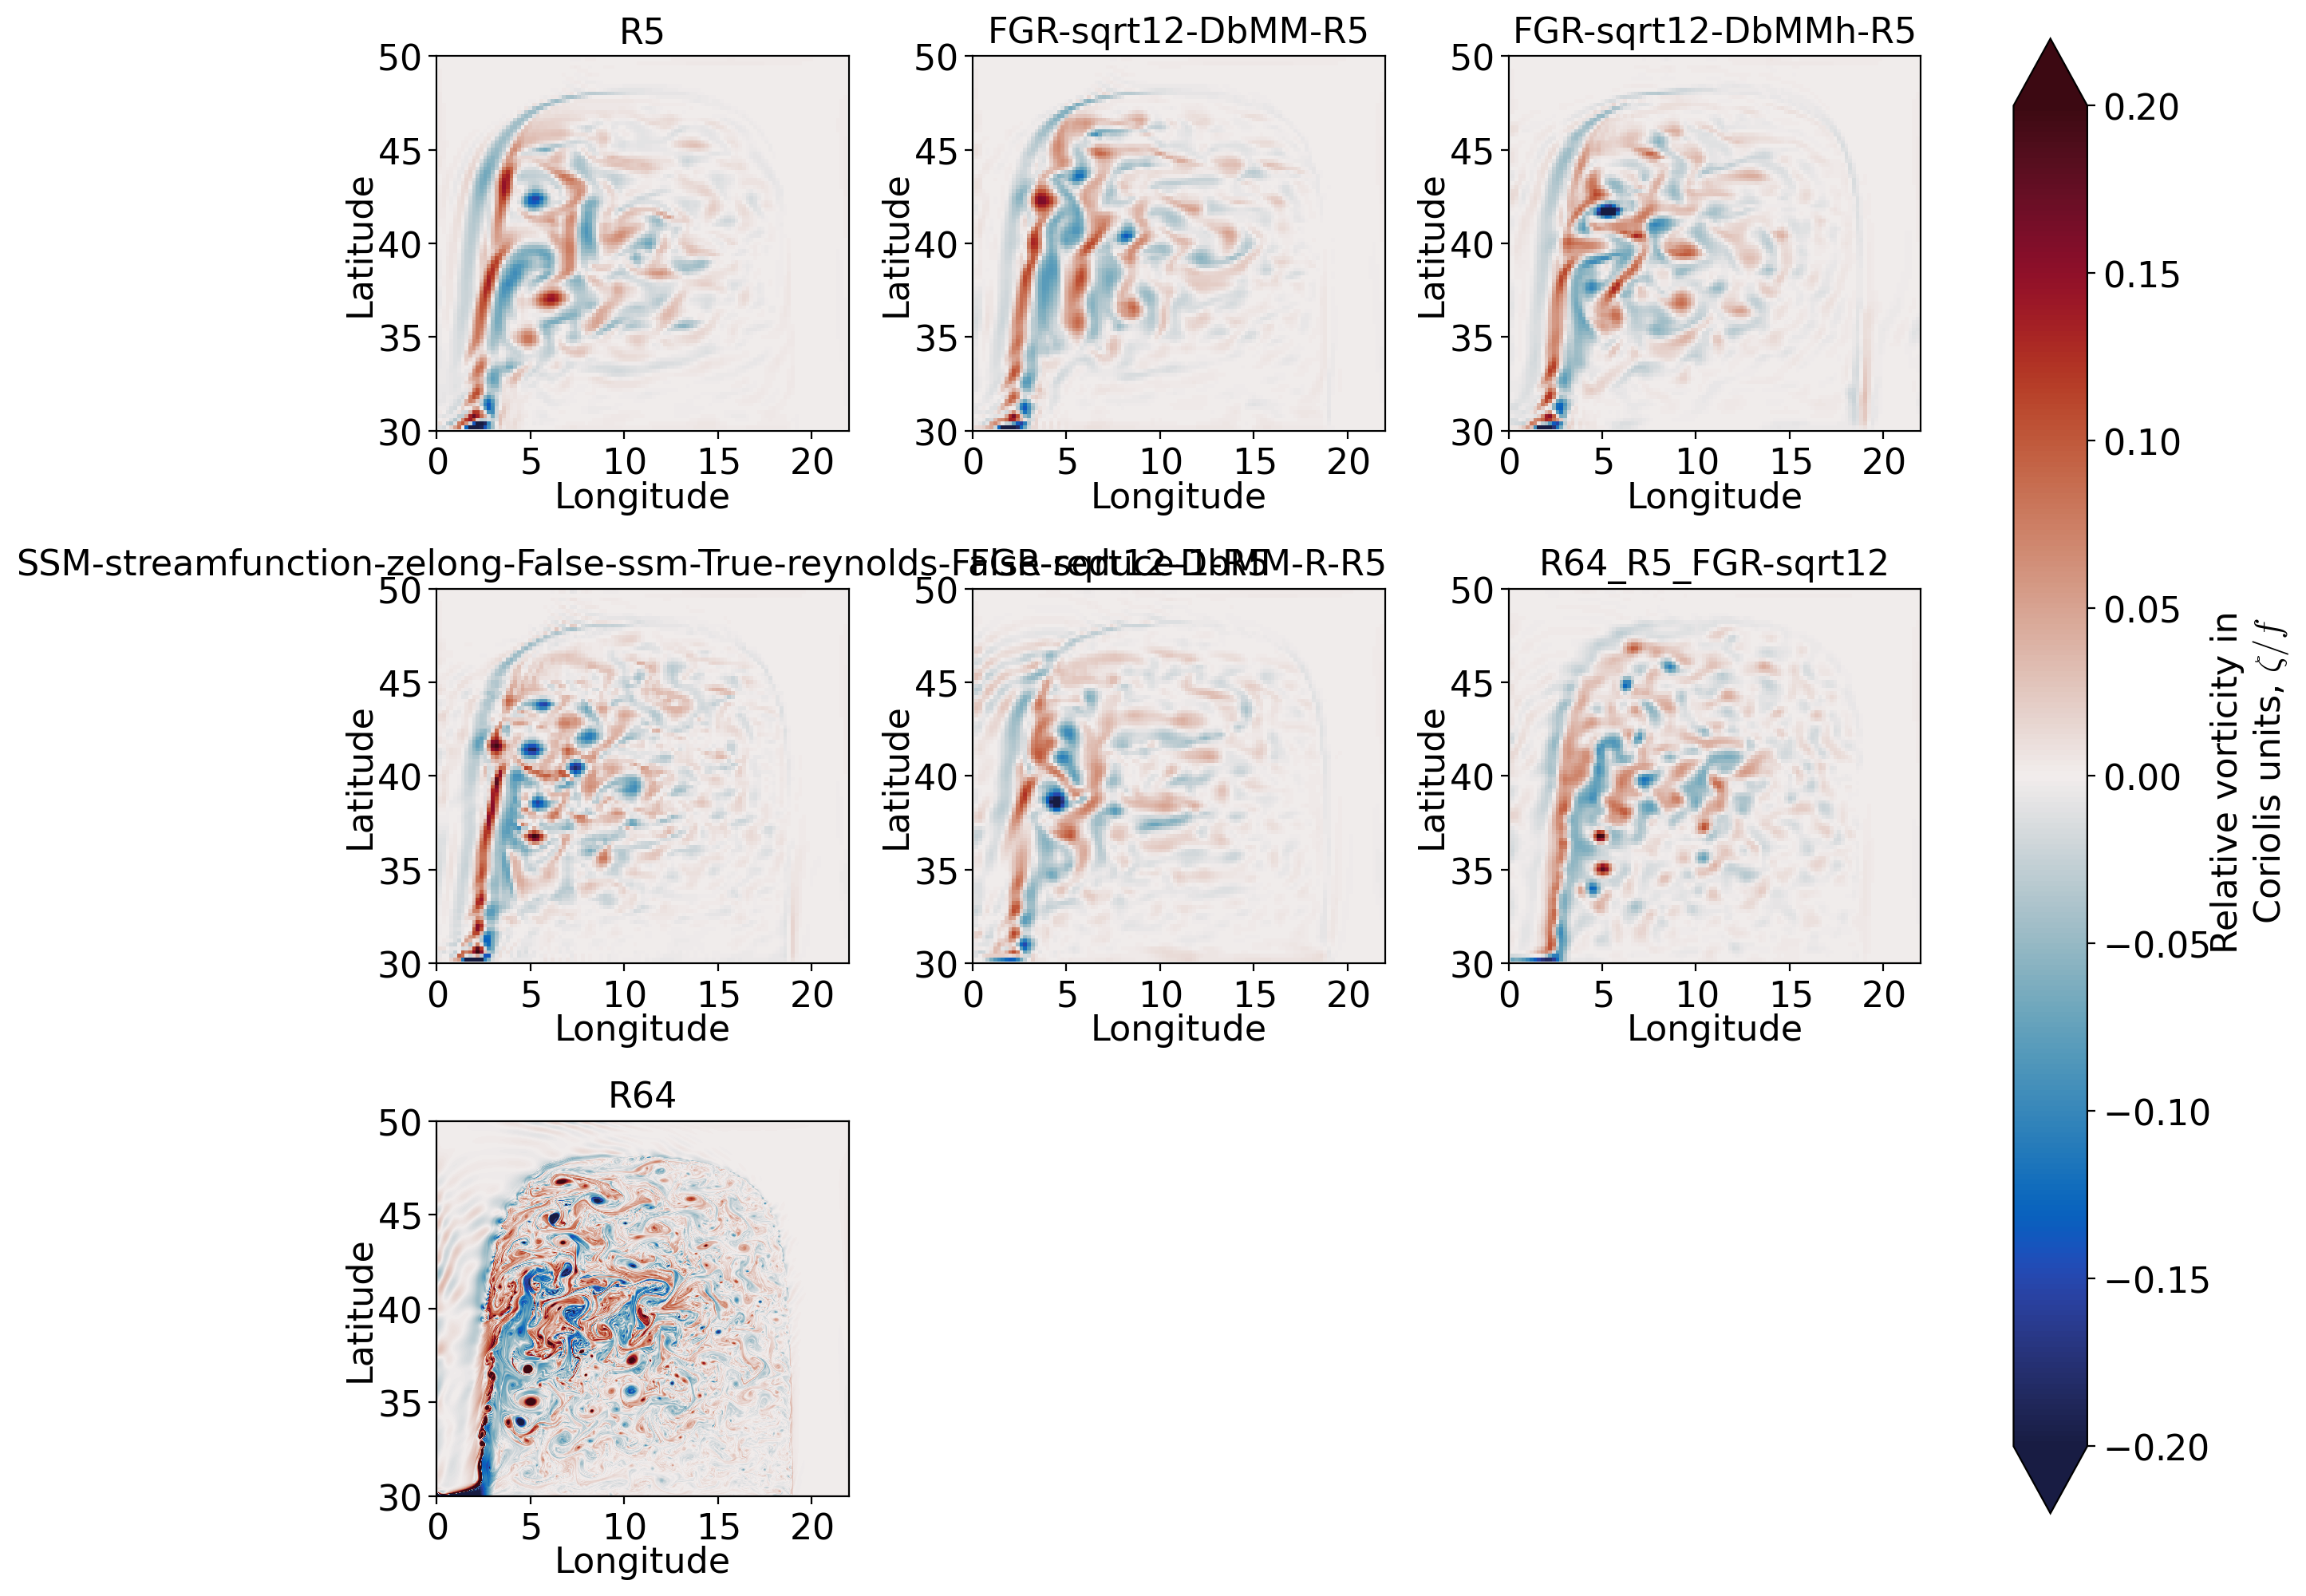

In [70]:
RR = 'R5'
ds.plot_RV([ f'{RR}', f'FGR-sqrt12-DbMM-{RR}',
            f'FGR-sqrt12-DbMMh-{RR}',
            f'SSM-streamfunction-zelong-False-ssm-True-reynolds-False-reduce-1-{RR}', f'FGR-sqrt12-DbMM-R-{RR}', f'R64_{RR}_FGR-sqrt12', 'R64'],idx=-5,zl=0)

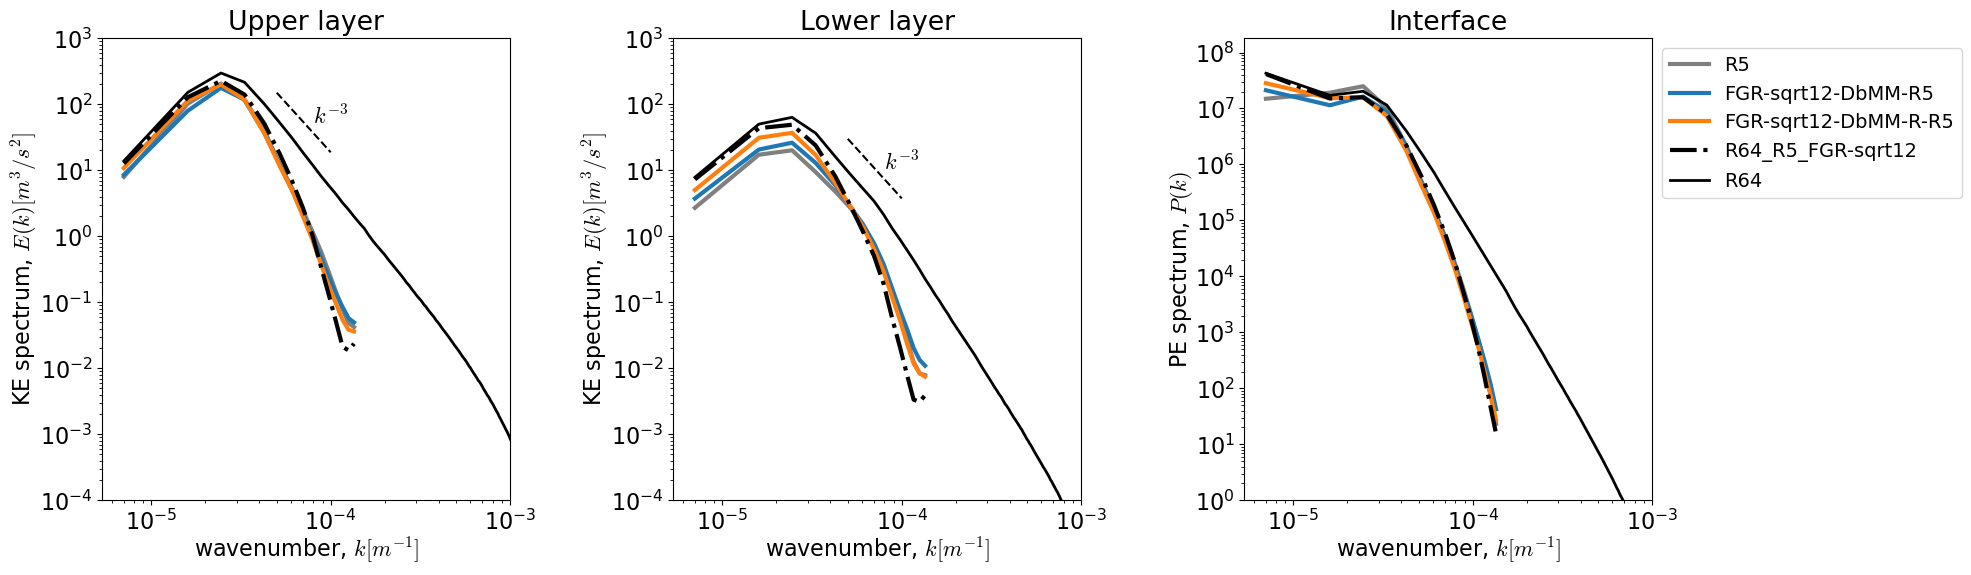

In [68]:
RR='R5'
ds.plot_KE_PE_spectrum([ 
                        f'{RR}', #f'{RR}-0.01',
                        f'FGR-sqrt12-DbMM-{RR}', 
                        #f'FGR-sqrt12-DbMMh-{RR}', 
                        #f'FGR-sqrt12-DbMMh-R-{RR}', 
                        f'FGR-sqrt12-DbMM-R-{RR}', 
                        #f'R64_{RR}_FGR-sqrt6',
                        f'R64_{RR}_FGR-sqrt12', 
                        'R64'
                        ],
                        color={'R64': 'k', f'R64_{RR}_FGR-sqrt12': 'k', f'{RR}': 'gray', f'{RR}-0.01': 'gray'}, ls={f'R64_{RR}_FGR-sqrt12': '-.', f'{RR}-0.01': ':'});

ds.plot_domain()

# Convergence figure

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


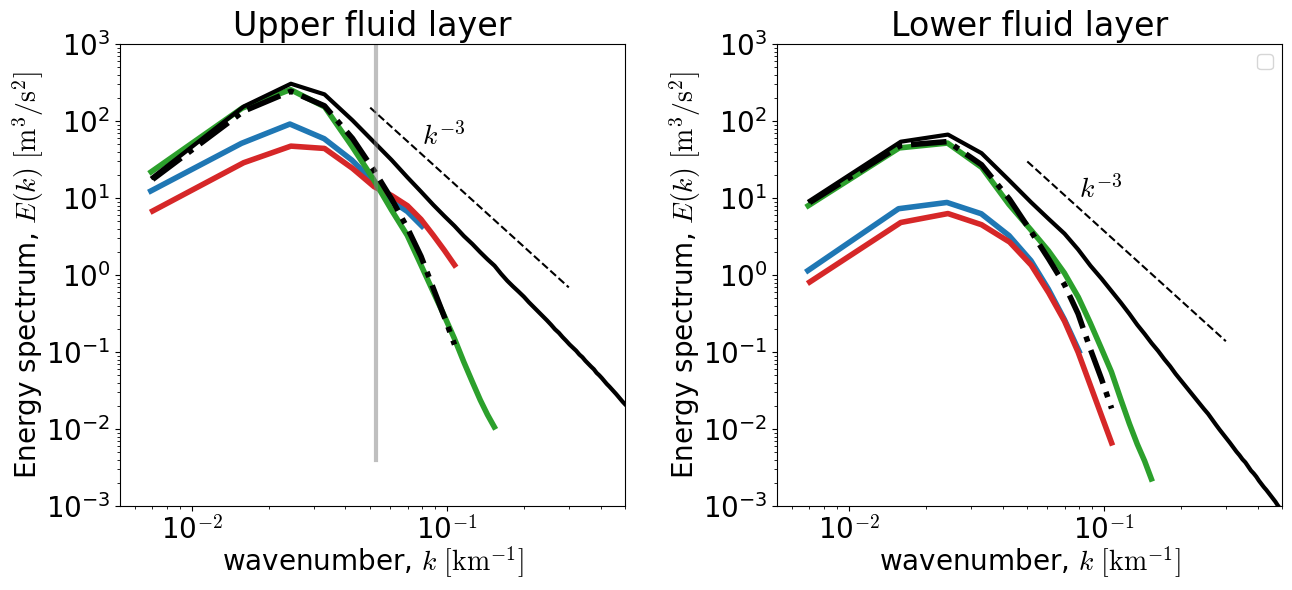

In [84]:
yellow = [0.9290, 0.6940, 0.1250]
violet = [0.4940, 0.1840, 0.5560]
lightblue = [0.3010, 0.7450, 0.9330]
default_rcParams({'font.size':20, 'figure.subplot.wspace': 0.3, 'figure.subplot.hspace': 0.15})
ds.plot_KE_spectrum([
                     'boundary10-zelong-True-ssm-True-reynolds-True-reduce-0-R4-FGR-2', 
                     'boundary10-zelong-True-ssm-True-reynolds-True-reduce-0-R4', 
                     'boundary10-zelong-True-ssm-True-reynolds-True-reduce-0-R4-FGR-sqrt12',
                     'R64_R4_FGR-sqrt6', 'R64'],
                     labels = ['']*5,
                    color={'R64_R4_FGR-sqrt6': 'k', 'R64': 'k', 
                           'boundary10-zelong-True-ssm-True-reynolds-True-reduce-0-R4-FGR-2': 'tab:blue',
                           'boundary10-zelong-True-ssm-True-reynolds-True-reduce-0-R4': 'tab:red',
                           'boundary10-zelong-True-ssm-True-reynolds-True-reduce-0-R4-FGR-sqrt12': 'tab:green'
                          }, ls={'R64_R4_FGR-sqrt6': '-.'}, key='KE_spectrum');
plt.savefig('final/figure-convergence.pdf')

In [47]:
dx = float(np.sqrt(ds['R4'].param.dxT * ds['R4'].param.dyT).mean() / 1000.)
delta_bar = dx * np.sqrt(6)
k_bar = np.pi / delta_bar
print(dx, delta_bar, k_bar)

24.27339523729545 59.45743265627725 0.05283767753228272


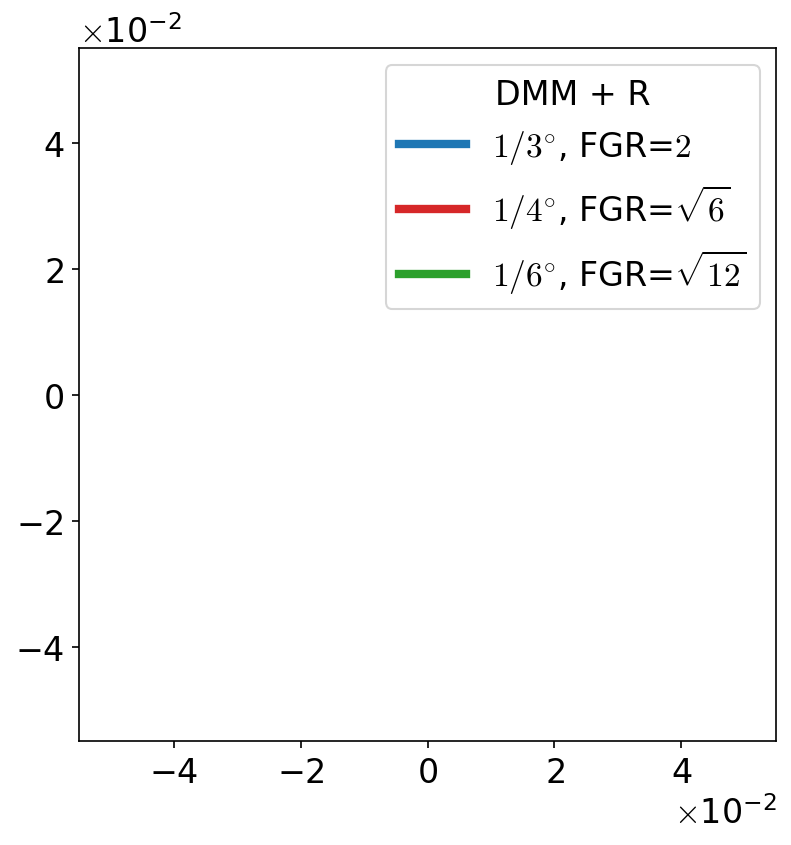

In [90]:
plt.figure(figsize=(6,6),dpi=150)
plt.plot(np.nan,np.nan,lw=4,color='tab:blue', label='$1/3^{\circ}$, FGR=$2$')
plt.plot(np.nan,np.nan,lw=4,color='tab:red', label='$1/4^{\circ}$, FGR=$\sqrt{6}$')
plt.plot(np.nan,np.nan,lw=4,color='tab:green', label='$1/6^{\circ}$, FGR=$\sqrt{12}$')
plt.legend(title='DMM + R')

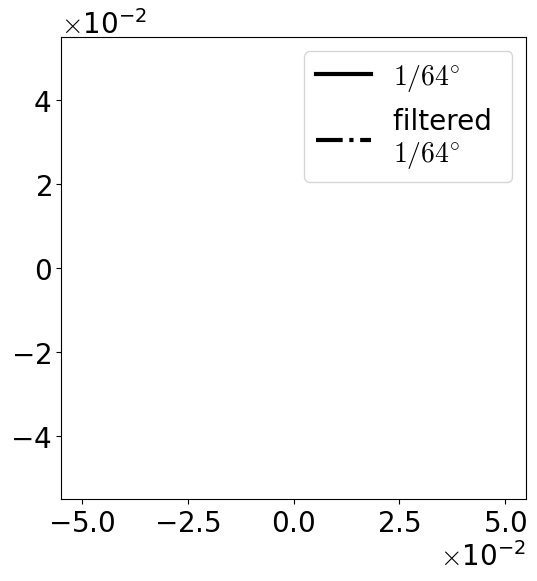

In [79]:
plt.figure(figsize=(6,6))
plt.plot(np.nan,np.nan,lw=3,color='k', label='$1/64^{\circ}$')
plt.plot(np.nan,np.nan,lw=3,ls='-.',color='k', label='filtered \n$1/64^{\circ}$')
plt.legend()